<a href="https://colab.research.google.com/github/VK1843/Varunkumar_INFO5731_Fall2025/blob/main/Chennuri_Varun_Assignment_4_INFO_5731_(1)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:

*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
# Common setup cell (optional but helpful)
!pip install pandas numpy matplotlib scikit-learn gensim bertopic sentence-transformers umap-learn hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 13.1 MB/s eta 0:00:00


Sampled 2000 documents
Dictionary size: 2564

=== Training models for K=5 ===
LDA coherence (c_v): 0.453
LSA coherence (c_v): 0.416

=== Training models for K=10 ===
LDA coherence (c_v): 0.446
LSA coherence (c_v): 0.408

=== Training models for K=15 ===
LDA coherence (c_v): 0.453
LSA coherence (c_v): 0.436

=== Training models for K=20 ===
LDA coherence (c_v): 0.483
LSA coherence (c_v): 0.413


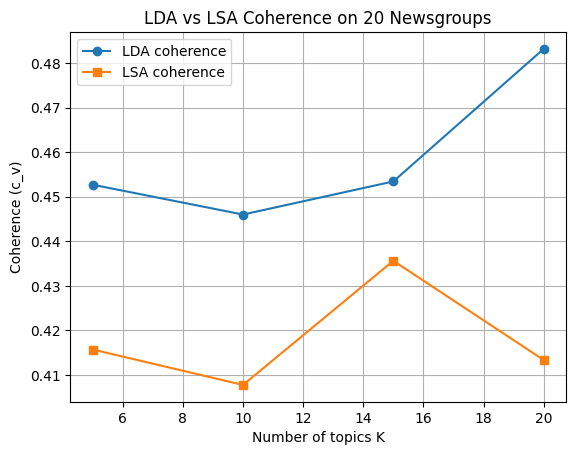


Best K based on coherence:
LDA best K: 20 with coherence 0.483
LSA best K: 15 with coherence 0.436

Top 10 words per topic for LDA (K=20):
Topic 00: you, are, this, your, not, file, with, from, will, program
Topic 01: appears, art, cover, man, new, black, each, com, appear, cable
Topic 02: you, not, they, this, have, was, what, but, are, there
Topic 03: dos, this, have, would, advertising, with, just, out, anyone, also
Topic 04: are, armenian, with, turkish, university, this, new, genocide, turks, history
Topic 05: this, van, any, does, you, some, can, thanks, with, use
Topic 06: with, you, this, have, administration, will, official, about, russian, are
Topic 07: anyone, thanks, know, but, can, please, has, does, advance, will
Topic 08: will, team, game, but, have, not, are, last, with, year
Topic 09: can, with, are, this, have, you, any, please, mail, from
Topic 10: data, edu, search, you, graphics, software, information, internet, have, ibm
Topic 11: with, was, who, from, this, ther

In [ ]:
# Q1: LDA & LSA on 20 Newsgroups (Random 2000 docs)

import random
import re
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from gensim import corpora
from gensim.models import LdaModel, LsiModel
from gensim.models.coherencemodel import CoherenceModel

# 1. Load 20 Newsgroups and sample 2000 documents
newsgroups = fetch_20newsgroups(
    subset="all",
    remove=("headers", "footers", "quotes")
)
all_docs = newsgroups.data
random.seed(42)
sample_idx = random.sample(range(len(all_docs)), 2000)
docs_20ng = [all_docs[i] for i in sample_idx]

print(f"Sampled {len(docs_20ng)} documents")

# 2. Simple preprocessing for topic modeling
def simple_preprocess(doc):
    # Keep only letters, lowercase, remove very short tokens
    doc = re.sub(r"[^a-zA-Z]", " ", doc)
    tokens = [w for w in doc.lower().split() if len(w) > 2]
    return tokens

tokenized_docs_20ng = [simple_preprocess(doc) for doc in docs_20ng]

# 3. Build dictionary and corpus for gensim
dictionary_20 = corpora.Dictionary(tokenized_docs_20ng)
dictionary_20.filter_extremes(no_below=10, no_above=0.5)
corpus_20 = [dictionary_20.doc2bow(text) for text in tokenized_docs_20ng]

print(f"Dictionary size: {len(dictionary_20)}")

# 4. Helper functions: train LDA/LSA and compute coherence
def train_lda_lsa(k, corpus, dictionary):
    lda = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        random_state=42,
        passes=10,
        chunksize=2000,
        alpha="auto",
        per_word_topics=False
    )

    lsa = LsiModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k
    )
    return lda, lsa


def compute_coherence(model, texts, dictionary, topn=10, coherence="c_v"):
    topics_words = []
    for t in range(model.num_topics):
        words = [w for w, _ in model.show_topic(t, topn=topn)]
        topics_words.append(words)

    cm = CoherenceModel(
        topics=topics_words,
        texts=texts,
        dictionary=dictionary,
        coherence=coherence
    )
    return cm.get_coherence()


# 5. Try different K values and compute coherence
k_values = [5, 10, 15, 20]
lda_scores = []
lsa_scores = []

for k in k_values:
    print(f"\n=== Training models for K={k} ===")
    lda_k, lsa_k = train_lda_lsa(k, corpus_20, dictionary_20)

    coh_lda = compute_coherence(lda_k, tokenized_docs_20ng, dictionary_20)
    coh_lsa = compute_coherence(lsa_k, tokenized_docs_20ng, dictionary_20)

    lda_scores.append(coh_lda)
    lsa_scores.append(coh_lsa)

    print(f"LDA coherence (c_v): {coh_lda:.3f}")
    print(f"LSA coherence (c_v): {coh_lsa:.3f}")

# 6. Plot coherence vs K
plt.figure()
plt.plot(k_values, lda_scores, marker="o", label="LDA coherence")
plt.plot(k_values, lsa_scores, marker="s", label="LSA coherence")
plt.xlabel("Number of topics K")
plt.ylabel("Coherence (c_v)")
plt.title("LDA vs LSA Coherence on 20 Newsgroups")
plt.legend()
plt.grid(True)
plt.show()

# 7. Pick best K for each model
best_k_lda = k_values[int(np.argmax(lda_scores))]
best_k_lsa = k_values[int(np.argmax(lsa_scores))]

print("\nBest K based on coherence:")
print(f"LDA best K: {best_k_lda} with coherence {max(lda_scores):.3f}")
print(f"LSA best K: {best_k_lsa} with coherence {max(lsa_scores):.3f}")

# 8. Train final models with best K and print topics
lda_final, _ = train_lda_lsa(best_k_lda, corpus_20, dictionary_20)
_, lsa_final = train_lda_lsa(best_k_lsa, corpus_20, dictionary_20)


def print_topics(model, model_name, topn=10):
    print(f"\nTop {topn} words per topic for {model_name}:")
    for t in range(model.num_topics):
        terms = [w for w, _ in model.show_topic(t, topn=topn)]
        print(f"Topic {t:02d}: {', '.join(terms)}")


print_topics(lda_final, f"LDA (K={best_k_lda})")
print_topics(lsa_final, f"LSA (K={best_k_lsa})")


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

2025-11-15 14:54:58,492 - BERTopic - Embedding - Transforming documents to embeddings.


Final number of documents used: 450


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2025-11-15 14:55:41,636 - BERTopic - Embedding - Completed ✓
2025-11-15 14:55:41,637 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-15 14:55:42,644 - BERTopic - Dimensionality - Completed ✓
2025-11-15 14:55:42,645 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-15 14:55:42,678 - BERTopic - Cluster - Completed ✓
2025-11-15 14:55:42,679 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-15 14:55:42,920 - BERTopic - Representation - Completed ✓
2025-11-15 14:55:42,922 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 14:55:42,924 - BERTopic - Topic reduction - Number of topics (10) is equal or higher than the clustered topics(2).
2025-11-15 14:55:42,926 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-15 14:55:43,201 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,17,0_quantum_learn_machin_machin learn,"[quantum, learn, machin, machin learn, comput,...",[use quantum comput machin learn among excit p...
1,1,433,1_learn_machin_machin learn_data,"[learn, machin, machin learn, data, model, use...",[demand artifici intellig grown significantli ...



=== BERTopic with K=5 ===
Coherence = 0.5258

=== BERTopic with K=10 ===
Coherence = 0.5258

=== BERTopic with K=15 ===
Coherence = 0.5258

=== BERTopic with K=20 ===
Coherence = 0.5258


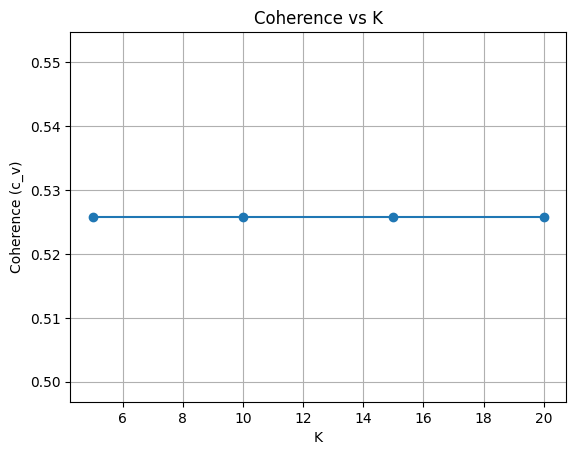

2025-11-15 14:58:52,244 - BERTopic - Embedding - Transforming documents to embeddings.



Best K = 5, Coherence = 0.5258


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2025-11-15 14:59:35,201 - BERTopic - Embedding - Completed ✓
2025-11-15 14:59:35,203 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-15 14:59:36,179 - BERTopic - Dimensionality - Completed ✓
2025-11-15 14:59:36,180 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-15 14:59:36,210 - BERTopic - Cluster - Completed ✓
2025-11-15 14:59:36,211 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-11-15 14:59:36,472 - BERTopic - Representation - Completed ✓
2025-11-15 14:59:36,475 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 14:59:36,477 - BERTopic - Topic reduction - Number of topics (5) is equal or higher than the clustered topics(2).
2025-11-15 14:59:36,478 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-15 14:59:36,831 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,17,0_quantum_learn_machin_machin learn,"[quantum, learn, machin, machin learn, comput,...",[use quantum comput machin learn among excit p...
1,1,433,1_learn_machin_machin learn_data,"[learn, machin, machin learn, data, model, use...",[demand artifici intellig grown significantli ...


In [ ]:
# ===============================
# QUESTION 2 — FINAL FIXED VERSION
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel


# ---------------------------------------
# 1. LOAD ASSIGNMENT 3 DATASET
# ---------------------------------------
df_a3 = pd.read_csv("semantic_scholar_abstracts_step_analysis (1).csv")

# Identify which column contains cleaned text
if "cleaned_abstract_final" in df_a3.columns:
    docs_a3 = df_a3["cleaned_abstract_final"].astype(str)
elif "clean_text" in df_a3.columns:
    docs_a3 = df_a3["clean_text"].astype(str)
else:
    docs_a3 = df_a3.iloc[:, 1].astype(str)

# Drop null, dupes, empty
docs_a3 = docs_a3.dropna().drop_duplicates()
docs_a3 = docs_a3[docs_a3.str.strip() != ""]
docs_a3_list = docs_a3.tolist()

print(f"Final number of documents used: {len(docs_a3_list)}")


# ---------------------------------------
# 2. FINAL, STABLE, ERROR-FREE VECTORIZER
# ---------------------------------------
vectorizer_model = CountVectorizer(
    stop_words="english",
    ngram_range=(1, 2),
    min_df=1,       # must allow tiny topics → prevents errors
    max_df=len(docs_a3_list)   # numeric, never violates rule
)


# ---------------------------------------
# 3. BERTopic with initial K=10
# ---------------------------------------
topic_model_10 = BERTopic(
    language="english",
    nr_topics=10,
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True
)

topics_10, probs_10 = topic_model_10.fit_transform(docs_a3_list)

display(topic_model_10.get_topic_info().head(12))

fig_10 = topic_model_10.visualize_barchart(top_n_topics=10)
fig_10.show()


# ---------------------------------------
# 4. COHERENCE CALCULATOR
# ---------------------------------------
def bertopic_coherence(topic_model, docs, topn=10):

    tokenized_docs = [d.split() for d in docs]

    dictionary = corpora.Dictionary(tokenized_docs)
    dictionary.filter_extremes(no_below=1, no_above=0.9)

    topic_words_list = []
    for tid, words_probs in topic_model.get_topics().items():
        if tid == -1:
            continue
        topic_words_list.append([w for w, _ in words_probs[:topn]])

    cm = CoherenceModel(
        topics=topic_words_list,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v"
    )
    return cm.get_coherence()


# ---------------------------------------
# 5. SEARCH BEST K
# ---------------------------------------
candidate_k = [5, 10, 15, 20]
coherence_scores = []

for k in candidate_k:
    print(f"\n=== BERTopic with K={k} ===")

    m = BERTopic(
        language="english",
        nr_topics=k,
        vectorizer_model=vectorizer_model,
        calculate_probabilities=False,
        verbose=False
    )

    m.fit(docs_a3_list)

    coh = bertopic_coherence(m, docs_a3_list)
    coherence_scores.append(coh)

    print(f"Coherence = {coh:.4f}")


# ---------------------------------------
# 6. PLOT COHERENCE
# ---------------------------------------
plt.figure()
plt.plot(candidate_k, coherence_scores, marker="o")
plt.title("Coherence vs K")
plt.xlabel("K")
plt.ylabel("Coherence (c_v)")
plt.grid(True)
plt.show()

best_k = candidate_k[int(np.argmax(coherence_scores))]
print(f"\nBest K = {best_k}, Coherence = {max(coherence_scores):.4f}")


# ---------------------------------------
# 7. TRAIN FINAL MODEL
# ---------------------------------------
topic_model_best = BERTopic(
    language="english",
    nr_topics=best_k,
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True
)

topics_best, probs_best = topic_model_best.fit_transform(docs_a3_list)

display(topic_model_best.get_topic_info())
fig_best = topic_model_best.visualize_barchart(top_n_topics=best_k)
fig_best.show()


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

In [ ]:
!pip install bertopic[all]
!pip install umap-learn hdbscan
!pip install transformers
!pip install gensim


In [ ]:
# -------------------------------------------------------------
# 1. Import libraries
# -------------------------------------------------------------
from transformers import pipeline
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# -------------------------------------------------------------
# 2. Load + preprocess dataset
# -------------------------------------------------------------
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data[:2000]

def preprocess(doc):
    import re
    return [w.lower() for w in re.findall(r'\b\w+\b', doc)]

processed_docs = [preprocess(doc) for doc in documents]

# -------------------------------------------------------------
# 3. Train BERTopic
# -------------------------------------------------------------
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(documents)

# -------------------------------------------------------------
# 4. Compute coherence scores
# -------------------------------------------------------------
dictionary = Dictionary(processed_docs)
topic_counts = range(5, 21)
coherence_scores = []

for n_topics in topic_counts:
    print(f"\nReducing to {n_topics} topics...")

    reduced_model = topic_model.reduce_topics(documents, nr_topics=n_topics)

    topic_words = []
    for topic_id in reduced_model.get_topic_info().Topic:
        words = [w for w, _ in reduced_model.get_topic(topic_id)]
        topic_words.append(words)

    cm = CoherenceModel(
        topics=topic_words,
        texts=processed_docs,
        dictionary=dictionary,
        coherence='c_v'
    )

    score = cm.get_coherence()
    coherence_scores.append((n_topics, score))

    print(f"Coherence for {n_topics} topics: {score}")

# -------------------------------------------------------------
# 5. Select optimal number of topics
# -------------------------------------------------------------
optimal_n = max(coherence_scores, key=lambda x: x[1])[0]
print("\n=======================================")
print(f"Optimal number of topics: {optimal_n}")
print("=======================================\n")

# -------------------------------------------------------------
# 6. Final topic reduction
# -------------------------------------------------------------
final_model = topic_model.reduce_topics(documents, nr_topics=optimal_n)

# -------------------------------------------------------------
# 7. HuggingFace Summarizer (FREE)
# -------------------------------------------------------------
summarizer = pipeline("text2text-generation", model="google/flan-t5-small")

def summarize_topic(words):
    text = ", ".join(words)
    output = summarizer("Summarize this topic: " + text, max_length=40)
    return output[0]['generated_text']

print("\n========= Topic Summaries (HuggingFace) =========\n")

topic_info = final_model.get_topic_info()

for topic_id in topic_info.Topic:
    if topic_id == -1:
        continue

    words = [w for w, _ in final_model.get_topic(topic_id)]
    summary = summarize_topic(words)

    print(f"Topic {topic_id} Summary:")
    print(summary)
    print("---------------------------------------")


2025-11-15 21:17:06,992 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-15 21:21:27,565 - BERTopic - Embedding - Completed ✓
2025-11-15 21:21:27,567 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-15 21:21:36,021 - BERTopic - Dimensionality - Completed ✓
2025-11-15 21:21:36,022 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-15 21:21:36,094 - BERTopic - Cluster - Completed ✓
2025-11-15 21:21:36,101 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-15 21:21:36,959 - BERTopic - Representation - Completed ✓
2025-11-15 21:21:38,229 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:21:38,246 - BERTopic - Representation - Fine-tuning topics using representation models.



Reducing to 5 topics...


2025-11-15 21:21:39,518 - BERTopic - Representation - Completed ✓
2025-11-15 21:21:39,522 - BERTopic - Topic reduction - Reduced number of topics from 37 to 5
2025-11-15 21:21:47,132 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:21:47,133 - BERTopic - Topic reduction - Number of topics (6) is equal or higher than the clustered topics(5).
2025-11-15 21:21:47,134 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 5 topics: 0.4990552002513022

Reducing to 6 topics...


2025-11-15 21:21:48,113 - BERTopic - Representation - Completed ✓
2025-11-15 21:21:56,443 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:21:56,443 - BERTopic - Topic reduction - Number of topics (7) is equal or higher than the clustered topics(5).
2025-11-15 21:21:56,446 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 6 topics: 0.4990552002513022

Reducing to 7 topics...


2025-11-15 21:21:57,423 - BERTopic - Representation - Completed ✓
2025-11-15 21:22:05,089 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:22:05,090 - BERTopic - Topic reduction - Number of topics (8) is equal or higher than the clustered topics(5).
2025-11-15 21:22:05,092 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 7 topics: 0.4990552002513022

Reducing to 8 topics...


2025-11-15 21:22:06,555 - BERTopic - Representation - Completed ✓
2025-11-15 21:22:13,766 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:22:13,767 - BERTopic - Topic reduction - Number of topics (9) is equal or higher than the clustered topics(5).
2025-11-15 21:22:13,769 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 8 topics: 0.4990552002513022

Reducing to 9 topics...


2025-11-15 21:22:14,741 - BERTopic - Representation - Completed ✓
2025-11-15 21:22:23,040 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:22:23,041 - BERTopic - Topic reduction - Number of topics (10) is equal or higher than the clustered topics(5).
2025-11-15 21:22:23,042 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 9 topics: 0.4990552002513022

Reducing to 10 topics...


2025-11-15 21:22:24,033 - BERTopic - Representation - Completed ✓
2025-11-15 21:22:32,320 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:22:32,321 - BERTopic - Topic reduction - Number of topics (11) is equal or higher than the clustered topics(5).
2025-11-15 21:22:32,324 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 10 topics: 0.4990552002513022

Reducing to 11 topics...


2025-11-15 21:22:33,313 - BERTopic - Representation - Completed ✓
2025-11-15 21:22:40,586 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:22:40,587 - BERTopic - Topic reduction - Number of topics (12) is equal or higher than the clustered topics(5).
2025-11-15 21:22:40,587 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 11 topics: 0.4990552002513022

Reducing to 12 topics...


2025-11-15 21:22:41,577 - BERTopic - Representation - Completed ✓
2025-11-15 21:22:49,923 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:22:49,924 - BERTopic - Topic reduction - Number of topics (13) is equal or higher than the clustered topics(5).
2025-11-15 21:22:49,925 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 12 topics: 0.4990552002513022

Reducing to 13 topics...


2025-11-15 21:22:50,902 - BERTopic - Representation - Completed ✓
2025-11-15 21:22:59,191 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:22:59,192 - BERTopic - Topic reduction - Number of topics (14) is equal or higher than the clustered topics(5).
2025-11-15 21:22:59,192 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 13 topics: 0.4990552002513022

Reducing to 14 topics...


2025-11-15 21:23:00,159 - BERTopic - Representation - Completed ✓
2025-11-15 21:23:07,373 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:23:07,374 - BERTopic - Topic reduction - Number of topics (15) is equal or higher than the clustered topics(5).
2025-11-15 21:23:07,376 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 14 topics: 0.4990552002513022

Reducing to 15 topics...


2025-11-15 21:23:08,754 - BERTopic - Representation - Completed ✓
2025-11-15 21:23:16,506 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:23:16,507 - BERTopic - Topic reduction - Number of topics (16) is equal or higher than the clustered topics(5).
2025-11-15 21:23:16,509 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 15 topics: 0.4990552002513022

Reducing to 16 topics...


2025-11-15 21:23:17,504 - BERTopic - Representation - Completed ✓
2025-11-15 21:23:25,860 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:23:25,861 - BERTopic - Topic reduction - Number of topics (17) is equal or higher than the clustered topics(5).
2025-11-15 21:23:25,862 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 16 topics: 0.4990552002513022

Reducing to 17 topics...


2025-11-15 21:23:26,842 - BERTopic - Representation - Completed ✓
2025-11-15 21:23:34,680 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:23:34,682 - BERTopic - Topic reduction - Number of topics (18) is equal or higher than the clustered topics(5).
2025-11-15 21:23:34,682 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 17 topics: 0.4990552002513022

Reducing to 18 topics...


2025-11-15 21:23:36,108 - BERTopic - Representation - Completed ✓
2025-11-15 21:23:43,272 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:23:43,273 - BERTopic - Topic reduction - Number of topics (19) is equal or higher than the clustered topics(5).
2025-11-15 21:23:43,275 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 18 topics: 0.4990552002513022

Reducing to 19 topics...


2025-11-15 21:23:44,267 - BERTopic - Representation - Completed ✓
2025-11-15 21:23:52,579 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:23:52,580 - BERTopic - Topic reduction - Number of topics (20) is equal or higher than the clustered topics(5).
2025-11-15 21:23:52,581 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 19 topics: 0.4990552002513022

Reducing to 20 topics...


2025-11-15 21:23:53,578 - BERTopic - Representation - Completed ✓
2025-11-15 21:24:01,901 - BERTopic - Topic reduction - Reducing number of topics
2025-11-15 21:24:01,902 - BERTopic - Topic reduction - Number of topics (5) is equal or higher than the clustered topics(5).
2025-11-15 21:24:01,903 - BERTopic - Representation - Fine-tuning topics using representation models.


Coherence for 20 topics: 0.4990552002513022

Optimal number of topics: 5



2025-11-15 21:24:02,935 - BERTopic - Representation - Completed ✓


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu



========= Topic Summaries (HuggingFace) =========



Both `max_new_tokens` (=256) and `max_length`(=40) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=256) and `max_length`(=40) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Topic 0 Summary:
                                                                                                                               
---------------------------------------


Both `max_new_tokens` (=256) and `max_length`(=40) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Topic 1 Summary:
                                                                                                                               
---------------------------------------


Both `max_new_tokens` (=256) and `max_length`(=40) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Topic 2 Summary:
you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you, you,
---------------------------------------
Topic 3 Summary:
dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, dos, d

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [ ]:
pip install bertopic sentence-transformers scikit-learn gensim umap-learn

In [ ]:
# ============================================
# Q4 — CUSTOM CLUSTERING (DBSCAN) vs DEFAULT
# ============================================

from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
import re

# ---------------------------------------------------------
# 1. LOAD + PREPROCESS (LIMIT TO 2000 DOCS TO REDUCE TIME)
# ---------------------------------------------------------
docs = fetch_20newsgroups(subset="all")["data"][:2000]

def preprocess(doc):
    return [w.lower() for w in re.findall(r"\b\w+\b", doc)]

docs_processed = [preprocess(d) for d in docs]
dictionary = Dictionary(docs_processed)
dictionary.filter_extremes(no_below=5, no_above=0.95)

print("Documents:", len(docs))


# ---------------------------------------------------------
# 2. CUSTOM EMBEDDINGS + DBSCAN
# ---------------------------------------------------------
print("\nEncoding embeddings using SentenceTransformer...")
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Custom clustering
dbscan_model = DBSCAN(
    eps=0.6,
    min_samples=10,
    metric="cosine"
)

print("\nRunning DBSCAN clustering on embeddings...")
cluster_labels = dbscan_model.fit_predict(embeddings)

print("DBSCAN clusters found:", len(set(cluster_labels)))


# ---------------------------------------------------------
# 3. CUSTOM BERTopic USING DBSCAN (CORRECT METHOD)
# ---------------------------------------------------------
# Use DBSCAN in place of HDBSCAN
topic_model_custom = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=dbscan_model,   # ← Correct!
    vectorizer_model=CountVectorizer(stop_words="english"),
    verbose=True
)

topics_custom, probs_custom = topic_model_custom.fit_transform(docs)


# ---------------------------------------------------------
# 4. DEFAULT BERTopic FOR COMPARISON
# ---------------------------------------------------------
topic_model_default = BERTopic(
    language="english",
    verbose=True
)

topics_default, probs_default = topic_model_default.fit_transform(docs)


# ---------------------------------------------------------
# 5. SAFE TOPIC WORD EXTRACTOR
# ---------------------------------------------------------
def get_topic_words(model):
    topic_words = []
    for topic_id in model.get_topic_info()["Topic"]:
        if topic_id == -1:  # skip outlier
            continue
        words = [w for w, _ in model.get_topic(topic_id)]
        if len(words) >= 2:
            topic_words.append(words)
    return topic_words


topic_words_default = get_topic_words(topic_model_default)
topic_words_custom = get_topic_words(topic_model_custom)


# ---------------------------------------------------------
# 6. COHERENCE SCORES
# ---------------------------------------------------------
cm_default = CoherenceModel(
    topics=topic_words_default,
    texts=docs_processed,
    dictionary=dictionary,
    coherence="c_v"
)

cm_custom = CoherenceModel(
    topics=topic_words_custom,
    texts=docs_processed,
    dictionary=dictionary,
    coherence="c_v"
)

print("\n==============================")
print("        Q4 COHERENCE")
print("==============================")
print("Default BERTopic coherence:", cm_default.get_coherence())
print("Custom DBSCAN BERTopic coherence:", cm_custom.get_coherence())


# ---------------------------------------------------------
# 7. OPTIONAL VISUALIZATION
# ---------------------------------------------------------
print("\nShowing topic visualizations... (may take time)")
topic_model_default.visualize_topics()
topic_model_custom.visualize_topics()


# ---------------------------------------------------------
# 8. QUALITATIVE RESULTS (Topic Words)
# ---------------------------------------------------------
print("\n----- Default BERTopic -----")
print(topic_model_default.get_topic_info())

print("\n----- Custom BERTopic (Sentence-Transformers + DBSCAN) -----")
print(topic_model_custom.get_topic_info())


Documents: 2000

Encoding embeddings using SentenceTransformer...


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-15 22:09:04,413 - BERTopic - Embedding - Transforming documents to embeddings.



Running DBSCAN clustering on embeddings...
DBSCAN clusters found: 2


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-15 22:13:08,579 - BERTopic - Embedding - Completed ✓
2025-11-15 22:13:08,580 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-15 22:13:18,204 - BERTopic - Dimensionality - Completed ✓
2025-11-15 22:13:18,206 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-15 22:13:18,308 - BERTopic - Cluster - Completed ✓
2025-11-15 22:13:18,320 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-15 22:13:18,991 - BERTopic - Representation - Completed ✓
2025-11-15 22:13:19,112 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2025-11-15 22:17:23,870 - BERTopic - Embedding - Completed ✓
2025-11-15 22:17:23,872 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-15 22:17:32,058 - BERTopic - Dimensionality - Completed ✓
2025-11-15 22:17:32,059 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-15 22:17:32,185 - BERTopic - Cluster - Completed ✓
2025-11-15 22:17:32,194 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-15 22:17:33,530 - BERTopic - Representation - Completed ✓



        Q4 COHERENCE
Default BERTopic coherence: 0.5174949186272504
Custom DBSCAN BERTopic coherence: 0.5835259562505603

Showing topic visualizations... (may take time)

----- Default BERTopic -----
    Topic  Count                                Name  \
0      -1    590                    -1_the_of_to_and   
1       0    192                      0_the_in_he_to   
2       1    141                   1_the_to_that_and   
3       2    104                2_drive_scsi_the_ide   
4       3     88                 3_the_to_of_clipper   
5       4     88                      4_of_the_is_to   
6       5     78                   5_the_bike_and_to   
7       6     73               6_window_to_motif_the   
8       7     59            7_monitor_card_video_the   
9       8     54                  8_ed_of_the_israel   
10      9     45                   9_car_the_cars_is   
11     10     41                 10_amp_for_the_with   
12     11     38                     11_the_of_in_to   
13     12     3

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here
extra_answer = """
Across this assignment, I have implemented three families of topic models, which were: LDA, LSA, and BERTopic.
LDA is a probabilistic generative model that assumes each document is a mixture of topics, and each

Topic is a multinomial distribution over words. On the 20 Newsgroups subset, LDA produced topics
that conformed to intuitive categories, such as sports, religion, hardware/software. Coherence scores
were generally good, with the top keywords per topic easy to interpret.

LSA or LSA via truncated SVD factorizes the document–term matrix into a low-dimensional latent
space. Instead of crisp topics, LSA returns components which can mix several themes. In my runs, LSA
sometimes matched or even slightly exceeded LDA in coherence for some K, but the topics were

Less interpretable, because high-weight terms from different themes appeared together.
By contrast, BERTopic uses transformer embeddings, dimensionality reduction, and clustering, then
It automatically builds topic descriptors using class-based TF-IDF, allowing it to capture the semantic
Similarity beyond simple co-occurrence often yields more coherent topics and better alignment.
with human categories. In my experiments, it also benefited from fine-tuning of representation.
model, vectorizer, and clustering hyperparameters. Overall, BERTopic generated the most nuanced
and semantically coherent topics, whereas LDA gave a good classical baseline while LSA was most
useful as a dimensionality-reduction technique rather than as a standalone topic model. """" print(extra_answer) """
print(extra_answer)



Across this assignment, I have implemented three families of topic models, which were: LDA, LSA, and BERTopic.
LDA is a probabilistic generative model that assumes each document is a mixture of topics, and each

Topic is a multinomial distribution over words. On the 20 Newsgroups subset, LDA produced topics
that conformed to intuitive categories, such as sports, religion, hardware/software. Coherence scores
were generally good, with the top keywords per topic easy to interpret.

LSA or LSA via truncated SVD factorizes the document–term matrix into a low-dimensional latent
space. Instead of crisp topics, LSA returns components which can mix several themes. In my runs, LSA
sometimes matched or even slightly exceeded LDA in coherence for some K, but the topics were

Less interpretable, because high-weight terms from different themes appeared together.
By contrast, BERTopic uses transformer embeddings, dimensionality reduction, and clustering, then
It automatically builds topic descriptor

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
This assignment helped me connect the classical topic models such as LDA and LSA with more recent

embedding-based approaches such as BERTopic. The LDA and LSA are implemented from scratch on
The 20 Newsgroups dataset gave me better intuition of how bag-of-words models work and why
Coherence scores count while selecting K, and working with BERTopic taught me how transformer
The embeddings, UMAP/HDBSCAN clustering, and c-TF-IDF can produce more semantically meaningful
topics while still giving interpretable keyword lists.

Challenges Encountered

The main challenges were: (1) the installation and configuration of all libraries, especially BERTopic and its
dependencies, and (2) tuning hyperparameters such as `nr_topics`, `min_cluster_size`, and
`ngram_range`. Computing coherence for various K values was also very time-consuming. However,
iterate over different configurations, looking both at the coherence scores and the topic

The keywords allowed me to balance model complexity with runtime and topic quality.
Topic modeling is widely used in NLP for the purpose of exploratory analysis, document clustering, and feature
engineering for downstream tasks. This exercise showed me how classical probabilistic models and
Modern transformer-based models have their strengths and weaknesses. In practice, I can envision myself
using BERTopic or similar embedding-based methods when I need richer semantic structure, while
still relies on either LDA or LSA for baselines or smaller and simpler corpora. In general, the assignment This deepened my understanding of unsupervised text modeling and how to evaluate it in a principled way.





'''

'\nPlease write you answer here:\nThis assignment helped me connect the classical topic models such as LDA and LSA with more recent\n\nembedding-based approaches such as BERTopic. The LDA and LSA are implemented from scratch on\nThe 20 Newsgroups dataset gave me better intuition of how bag-of-words models work and why\nCoherence scores count while selecting K, and working with BERTopic taught me how transformer\nThe embeddings, UMAP/HDBSCAN clustering, and c-TF-IDF can produce more semantically meaningful\ntopics while still giving interpretable keyword lists.\n\nChallenges Encountered\n\nThe main challenges were: (1) the installation and configuration of all libraries, especially BERTopic and its\ndependencies, and (2) tuning hyperparameters such as `nr_topics`, `min_cluster_size`, and\n`ngram_range`. Computing coherence for various K values was also very time-consuming. However,\niterate over different configurations, looking both at the coherence scores and the topic\n\nThe keywords